<a href="https://colab.research.google.com/github/ANDRERAIMUNDO/atividade-02-PPGCC-2025_1/blob/main/Atividade_2_Z_score_e_Binomial_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quest√£o A

In [133]:
#Mostrando dados do dataset importado
#Fonte: https://dados.gov.br/dados/organizacoes/visualizar/agencia-nacional-de-telecomunicacoes
import pandas as pd
# Carregar o CSV conjunto-dados.csv
#data = pd.read_csv('nomes.csv.gz', compression='gzip')
data = pd.read_csv('solar_energy.csv')
display(data.head(5))

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

generated_solar_energy
Alta     2313
Baixa    1173
M√©dia     727
Name: count, dtype: int64

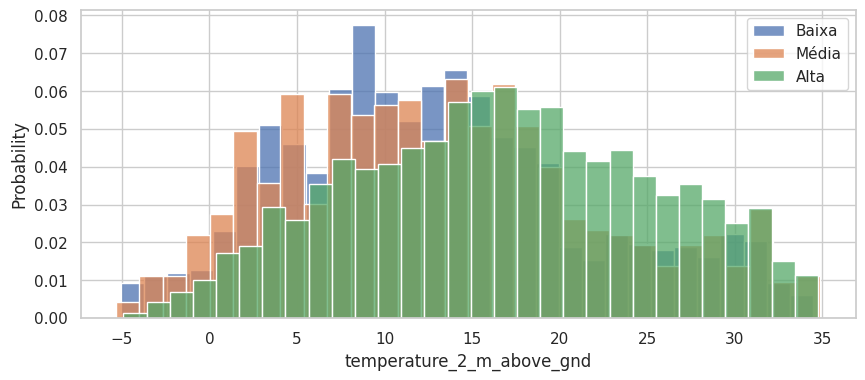

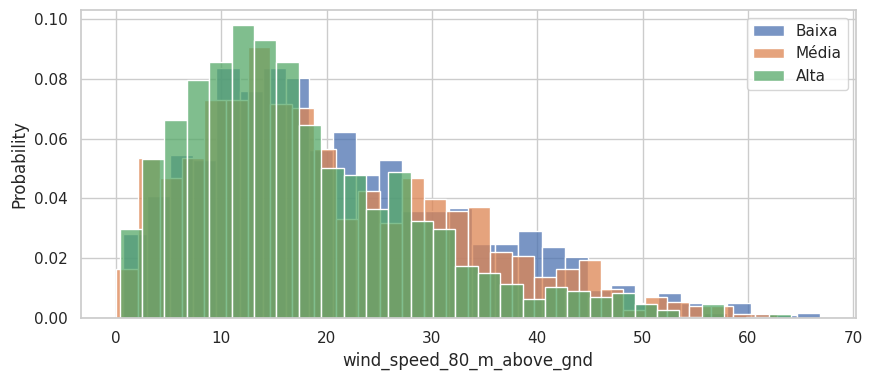

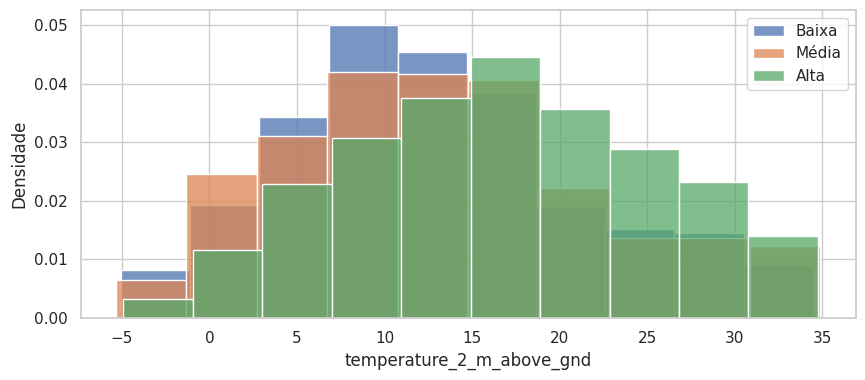

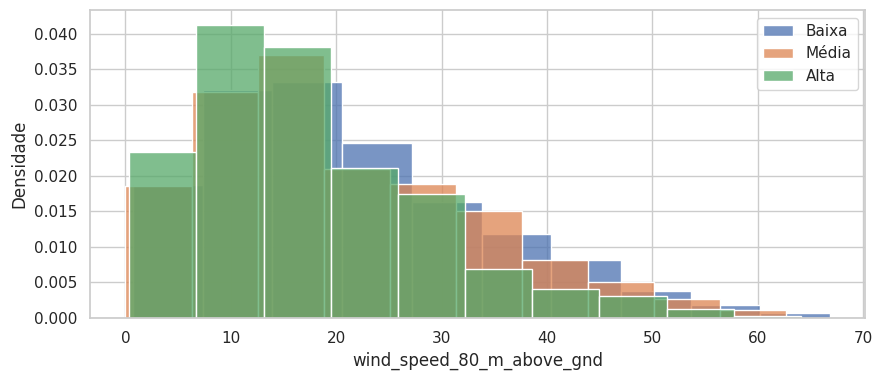

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset/data
dataSet = pd.read_csv('solar_energy.csv')
def generate_solar_ernegy(valor):
    if valor <= 300:
        return 'Baixa'
    elif valor <= 700:
        return 'M√©dia'
    else:
        return 'Alta'

dataSet['generated_solar_energy'] = dataSet['generated_power_kw'].apply(generate_solar_ernegy)
display(dataSet['generated_solar_energy'].value_counts())
features = ['temperature_2_m_above_gnd', 'wind_speed_80_m_above_gnd']

for feature in features:
    plt.figure(figsize=(10, 4))
    for classe in ['Baixa', 'M√©dia', 'Alta']:
        subset = dataSet[dataSet['generated_solar_energy'] == classe]
        sns.histplot(subset[feature], bins=30, label=classe, kde=False, stat="probability")
    plt.xlabel(feature); plt.ylabel('Probability'); plt.legend(); plt.show()

for feature in features:
    plt.figure(figsize=(10, 4))
    for classe in ['Baixa', 'M√©dia', 'Alta']:
        subset = dataSet[dataSet['generated_solar_energy'] == classe]
        sns.histplot(subset[feature], bins=10, label=classe, kde=False, stat="density")
    plt.xlabel(feature); plt.ylabel('Densidade'); plt.legend(); plt.show()


Com base no DataSet do exemplo, obtemos a densidade usando:
Densidade = Frequencia/n*Largura
linha de representa√ß√£o expressa em (...sns.histplot...stat="probability")
Da mesma forma pode-se obter a probalibilidade da temperatura cair e um determinado per√≠do com probabilidade de menor gera√ß√£o de ernegia, para isso usamos:
P = valor bin / total valores

# Quest√£o B


Situa√ß√£o: O sistema de controle e gest√£o de risco detecta uma queda de desempenho na rede. A politica coorporativa da empresa adota o COBIT como modelo de governan√ßa, umas das regras alinhada as estrategias de negocios da empresa √© manter problemas operacionais sempre abaixo de 6%. O sistema ao detectar um desvio acima da meedia inicia seu processo de recupera√ß√£o a apoio a tomada de decis√£o conforme √© ilustrado na imagem abaixo referente ao trabalho 01.

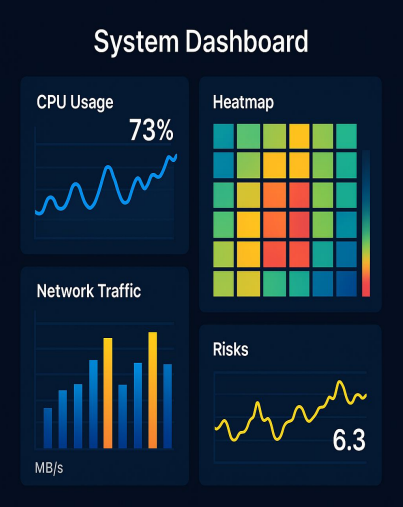
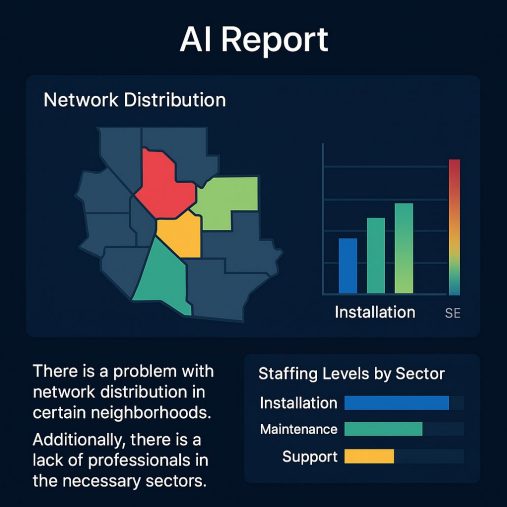


O c√≥digo abaixo √© uma base de dados que registra incidentes e a frequ√™ncia no qual ocorrem.

In [135]:
import pandas as pd
data = pd.read_csv('central/problemas.csv')
display(data.head(20))

ProblemID RelatedIncident                RootCause  Frequency        Status
0    PRB0001         INC0105         Conex√£o inst√°vel          8  Investigando
1    PRB0002         INC0162  Manuten√ß√£o mal sucedida          1     Corrigido
2    PRB0003         INC0003         Erro de firmware          8     Corrigido
3    PRB0004         INC0007      Sobrecarga el√©trica          6  Investigando
4    PRB0005         INC0264         Conex√£o inst√°vel          9  Investigando
5    PRB0006         INC0301         Erro de firmware          4  Identificado
6    PRB0007         INC0175         Conex√£o inst√°vel          4     Corrigido
7    PRB0008         INC0077         Conex√£o inst√°vel          8  Investigando
8    PRB0009         INC0447      Sobrecarga el√©trica          6     Corrigido
9    PRB0010         INC0062  Manuten√ß√£o mal sucedida          5     Corrigido
10   PRB0011         INC0429         Conex√£o inst√°vel          6  Identificado
11   PRB0012         INC0056         Erro de firmware          2  Investigando
12   PRB0013         INC0062  Manuten√ß√£o mal sucedida          3  Investigando
13   PRB0014         INC0046  Manuten√ß√£o mal sucedida          6  Investigando
14   PRB0015         INC0034         Erro de firmware          7     Corrigido
15   PRB0016         INC0487  Manuten√ß√£o mal sucedida          6     Corrigido
16   PRB0017         INC0133         Conex√£o inst√°vel          3  Identificado
17   PRB0018         INC0032         Erro de firmware          3     Corrigido
18   PRB0019         INC0474  Manuten√ß√£o mal sucedida          2  Identificado
19   PRB0020         INC0178  Manuten√ß√£o mal sucedida          6     Corrigido

Umas das formas para analisar as falhas usamos a distribui√ß√£o de Poisson, o gr√°fico abaixo mostra a frequ√™ncia de erros ocorridos tendo como par√¢metro Frequency.

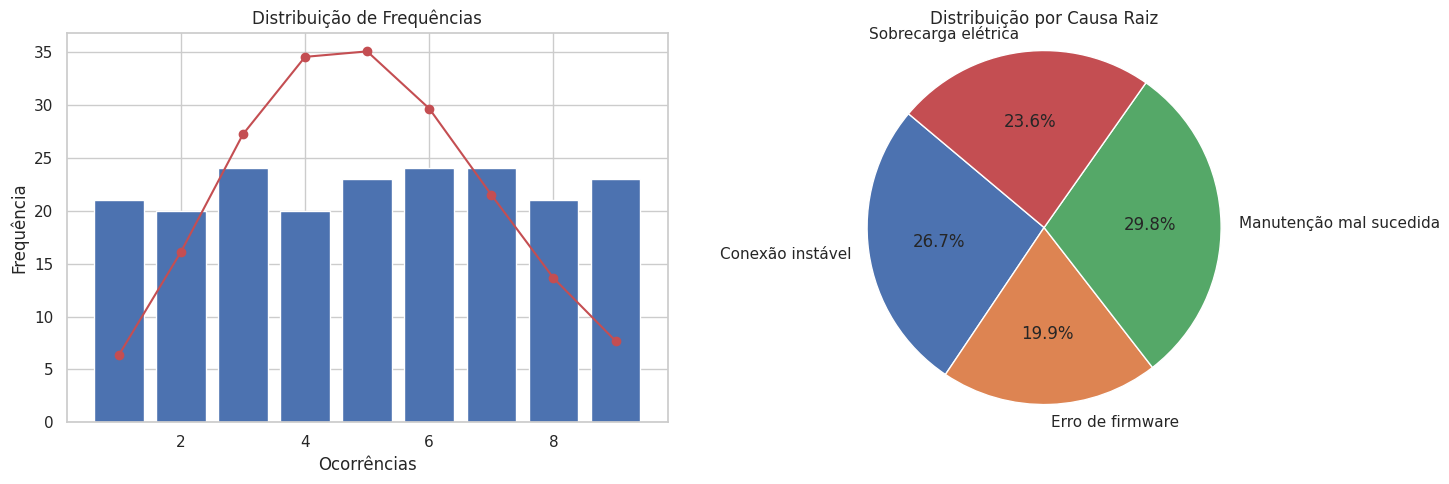

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

data = pd.read_csv('central/problemas.csv')

frequency = data["Frequency"]
lambda_poisson = frequency.mean()
value, counter_in_adjustment = np.unique(frequency, return_counts=True)
poisson = poisson.pmf(value, mu=lambda_poisson) * len(frequency)
general_root_cause = data.groupby("RootCause")["Frequency"].sum()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(value, counter_in_adjustment, alpha=1.0)
axs[0].plot(value, poisson, 'ro-')
axs[0].set_xlabel("Ocorr√™ncias")
axs[0].set_ylabel("Frequ√™ncia")
axs[0].set_title("Distribui√ß√£o de Frequ√™ncias")
axs[0].grid(True)
axs[1].pie(general_root_cause, labels=general_root_cause.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title("Distribui√ß√£o por Causa Raiz")
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Usando o mesmo modelo de distribui√ß√£o anterior a um n√≠vel organizacional a tomada de decis√£o os dados podem ser mostrados de diversas formas, como o exemplo abaixo.

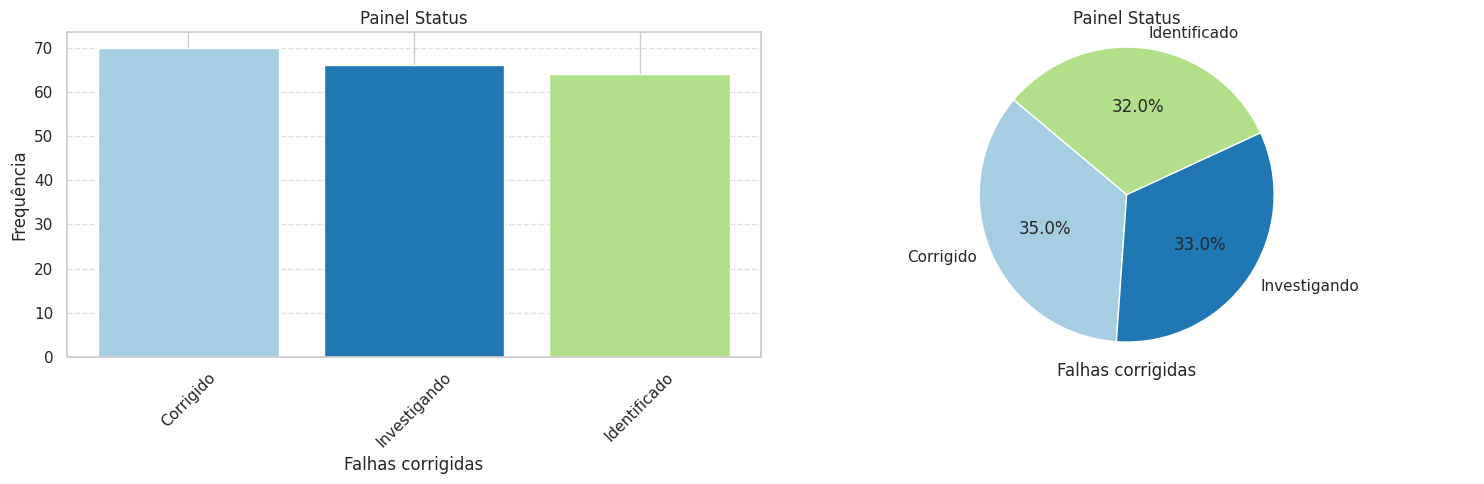

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

data = pd.read_csv('central/problemas.csv')

general_root_cause = data.groupby("RootCause")["Frequency"].sum()
status_counts = data['Status'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(status_counts.index, status_counts.values, color=plt.cm.Paired.colors)
axs[0].set_title('Painel Status')
axs[0].set_xlabel('Falhas corrigidas')
axs[0].set_ylabel('Frequ√™ncia')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
axs[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title('Painel Status')
axs[1].set_xlabel('Falhas corrigidas')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Para atender ao princ√≠pio Hol√≠stico e de Integridade entende-se que Status **Investigando** + **Identificado** = **n√£o corrigido**.

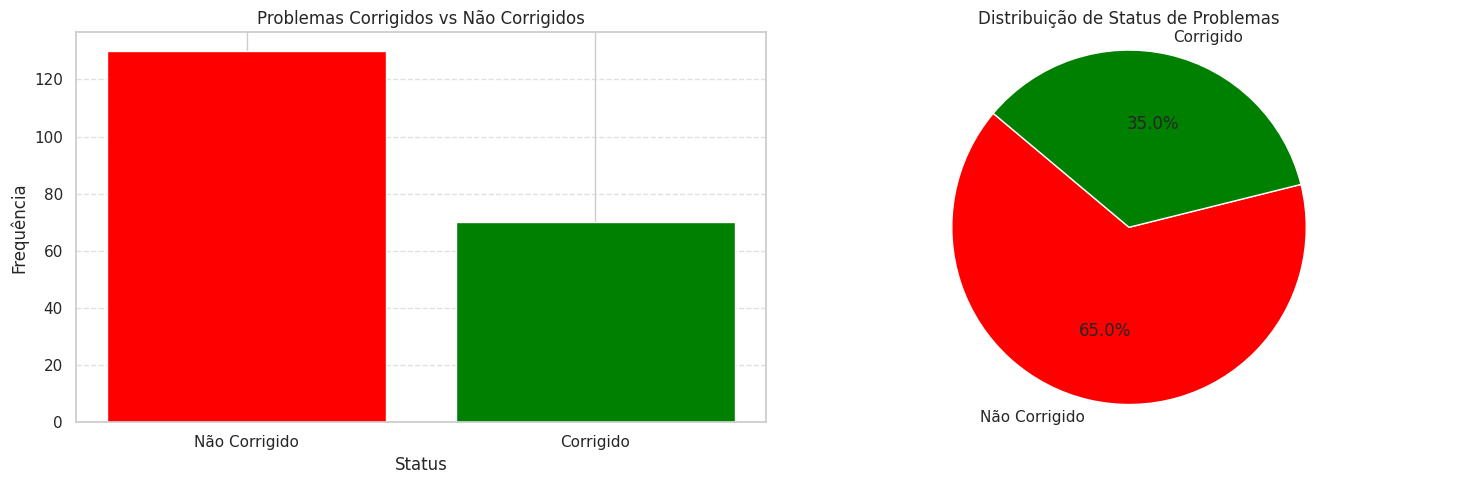

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('central/problemas.csv')

data['Status Agrupado'] = data['Status'].apply(lambda x: 'Corrigido' if x == 'Corrigido' else 'N√£o Corrigido')
counts = data['Status Agrupado'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(counts.index, counts.values, color=['red', 'green'])
axs[0].set_title('Problemas Corrigidos vs N√£o Corrigidos')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Frequ√™ncia')
axs[0].tick_params(axis='x', rotation=0)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
axs[1].set_title('Distribui√ß√£o de Status de Problemas')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Para a cria√ß√£o de melhores pr√°ticas de gerenciamento de servi√ßos de TI primeiro definimos as prioridades cruzando os novos inputs dos registros de incidentes com dados hist√≥ricos de incidentes da empresa.

RootCause       Score  Probabilidade_Sucesso
0  Conex√£o inst√°vel  125.124409                   19.1
1  Conex√£o inst√°vel  124.277033                   19.1
2  Conex√£o inst√°vel  114.424887                   19.1
3  Conex√£o inst√°vel  119.781297                   19.1
4  Conex√£o inst√°vel  116.555932                   19.1

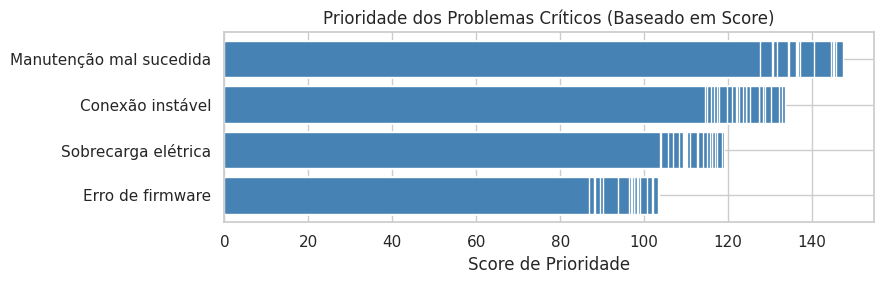

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('central/problemas.csv')
historical = pd.read_csv('historico_rootcause.csv')

total_problemas = data['Frequency'].sum()

rootcause_criticos = data.groupby('RootCause')['Frequency'].sum()
rootcause_criticos = rootcause_criticos[rootcause_criticos / total_problemas > 0.06]
rootcause_criticos = rootcause_criticos.reset_index()
rootcause_criticos.columns = ['RootCause', 'Frequency']

df_critico = rootcause_criticos.merge(historical, on='RootCause')

df_critico['Score'] = (
    df_critico['Frequency'] * 0.4 +
    df_critico['Ocorrencias_anteriores'] * 0.3 +
    (1 / df_critico['Tempo_medio_resolucao']) * 100 * 0.3
)

# simulations
sigma = df_critico['Desvio_padrao'].tolist()
simulacoes = {
    row['RootCause']: np.random.normal(loc=row['Tempo_medio_resolucao'], scale=sigma[i], size=1000)
    for i, row in df_critico.iterrows()
}
#Probability
max_acceptable_time = 5
probability = {
    causa: np.mean(sim < max_acceptable_time) * 100
    for causa, sim in simulacoes.items()
}

df_critico['Probabilidade_Sucesso'] = df_critico['RootCause'].map(probability)
display(df_critico[['RootCause', 'Score', 'Probabilidade_Sucesso']].head(5))

df_critico = df_critico.sort_values(by='Score', ascending=False)
plt.figure(figsize=(9, 3))
plt.barh(df_critico['RootCause'], df_critico['Score'], color='steelblue')
plt.xlabel('Score de Prioridade')
plt.title('Prioridade dos Problemas Cr√≠ticos (Baseado em Score)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Definida as prioridades mais cr√≠ticas, a equipe de TI inicia seu processo de recupera√ß√£o a apoio a tomada de decis√£o,√© poss√≠vel obter uma uma nova popula√ß√£o da base **historico_rootcause**, nesse exemplo usamos amostras de 30 elementos.

In [141]:
import pandas as pd
import numpy as np

data = pd.read_csv('historico_rootcause.csv')

agrupado = data.groupby('RootCause').agg({
    'Tempo_medio_resolucao': 'mean',
    'Desvio_padrao': 'mean'
}).reset_index()

medias_tlc = []

for _, row in agrupado.iterrows():
    causa = row['RootCause']
    mu = row['Tempo_medio_resolucao']
    sigma = row['Desvio_padrao']

    simulacoes = np.random.normal(loc=mu, scale=sigma, size=1000)

    for _ in range(500):
        amostra = np.random.choice(simulacoes, size=30, replace=True)
        media = np.mean(amostra)
        medias_tlc.append({'RootCause': causa, 'Media': media})

df_tlc = pd.DataFrame(medias_tlc)
df_tlc.to_csv('medias_amostrais_tlc.csv', index=False)

display(df_tlc.head(5))

RootCause     Media
0  Atualiza√ß√£o mal aplicada  5.799926
1  Atualiza√ß√£o mal aplicada  5.521059
2  Atualiza√ß√£o mal aplicada  5.562601
3  Atualiza√ß√£o mal aplicada  5.705820
4  Atualiza√ß√£o mal aplicada  5.634877


üìå Atualiza√ß√£o mal aplicada
  ‚Üí M√©dia esperada: 5.65 dias
  ‚Üí IC 95%: (5.64, 5.67) dias


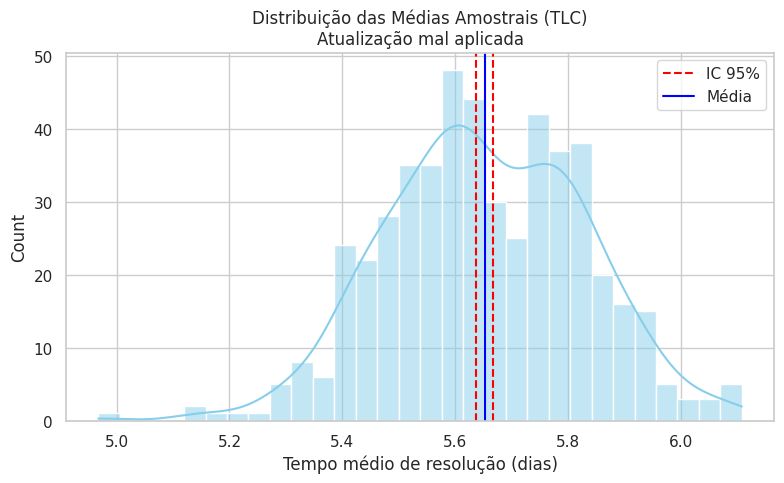


üìå Cabo rompido
  ‚Üí M√©dia esperada: 5.46 dias
  ‚Üí IC 95%: (5.44, 5.49) dias


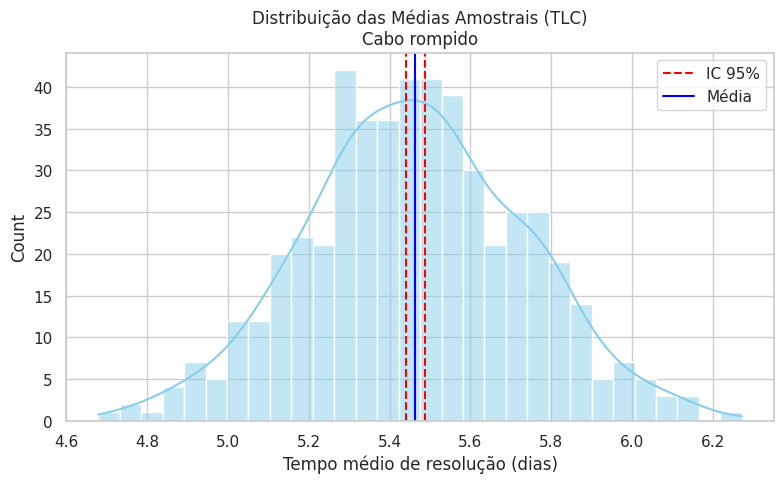


üìå Conex√£o inst√°vel
  ‚Üí M√©dia esperada: 5.85 dias
  ‚Üí IC 95%: (5.83, 5.87) dias


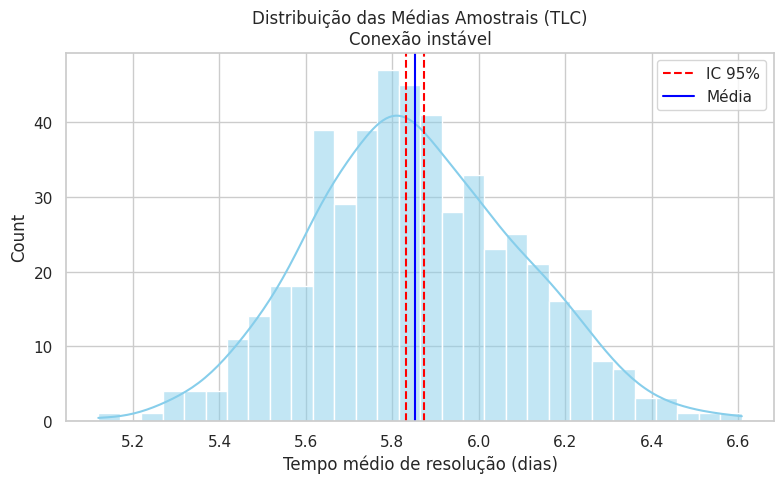


üìå Curto-circuito
  ‚Üí M√©dia esperada: 5.14 dias
  ‚Üí IC 95%: (5.12, 5.17) dias


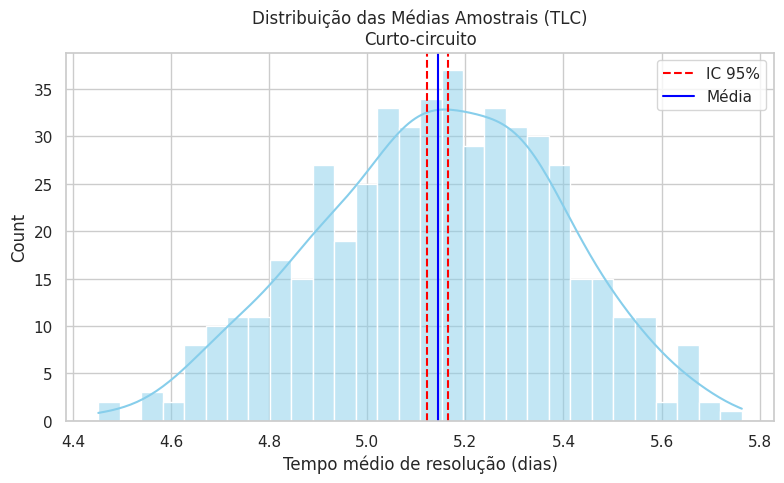


üìå Erro de firmware
  ‚Üí M√©dia esperada: 5.26 dias
  ‚Üí IC 95%: (5.23, 5.28) dias


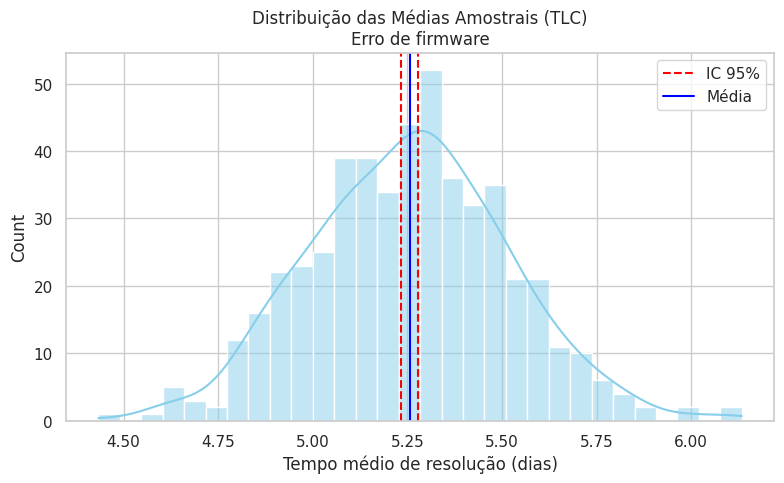


üìå Falha de roteador
  ‚Üí M√©dia esperada: 5.39 dias
  ‚Üí IC 95%: (5.37, 5.41) dias


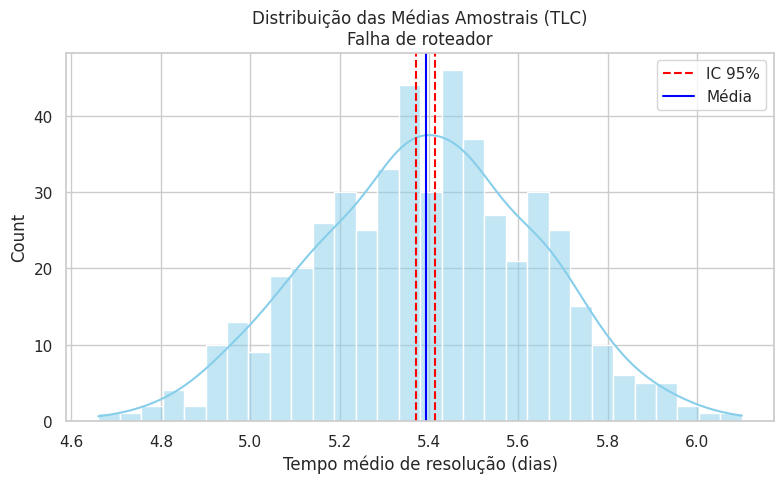


üìå Falta de energia
  ‚Üí M√©dia esperada: 5.15 dias
  ‚Üí IC 95%: (5.13, 5.18) dias


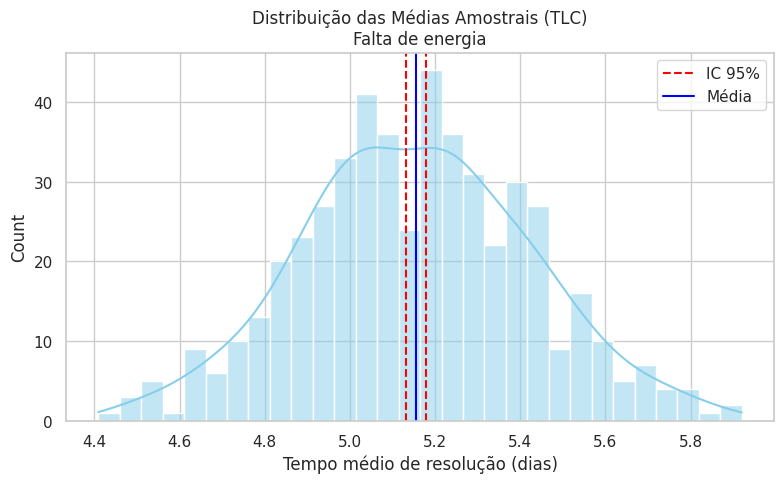


üìå Interfer√™ncia externa
  ‚Üí M√©dia esperada: 5.84 dias
  ‚Üí IC 95%: (5.83, 5.86) dias


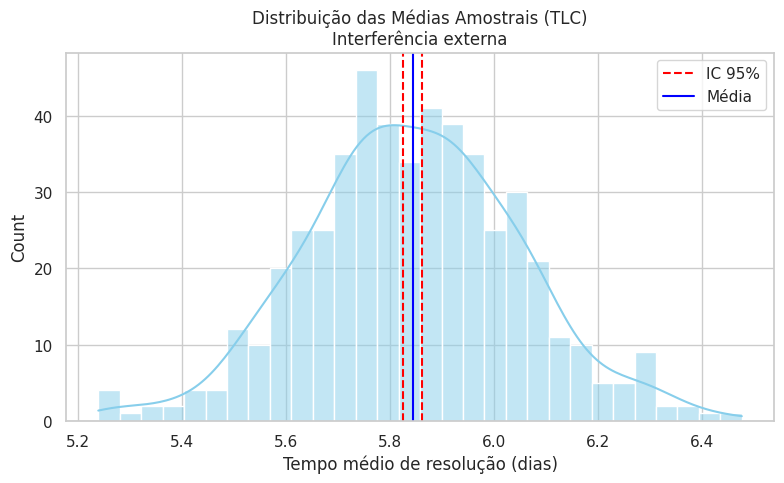


üìå Manuten√ß√£o mal sucedida
  ‚Üí M√©dia esperada: 5.01 dias
  ‚Üí IC 95%: (5.00, 5.03) dias


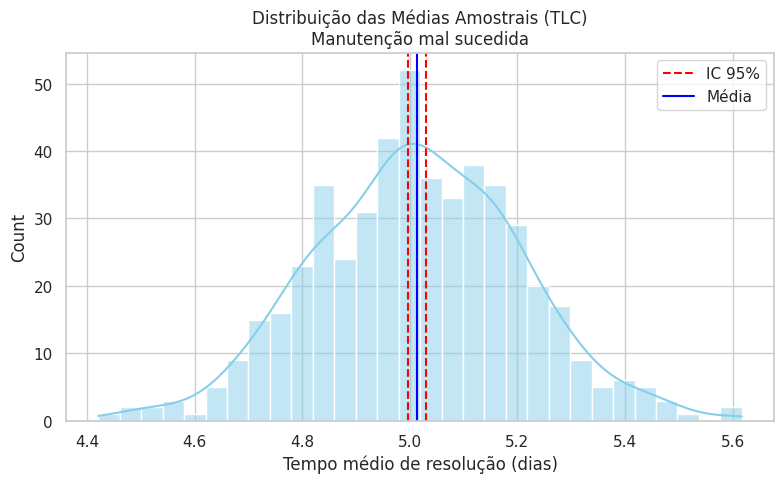


üìå Sobrecarga el√©trica
  ‚Üí M√©dia esperada: 5.49 dias
  ‚Üí IC 95%: (5.47, 5.51) dias


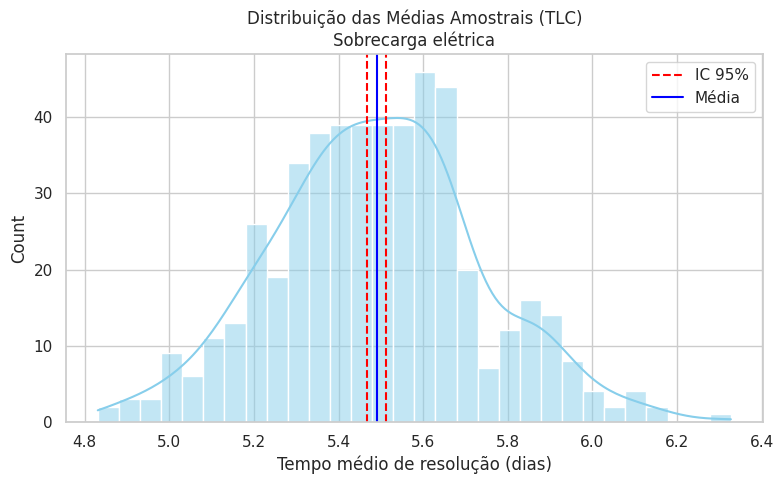

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_tlc = pd.read_csv('medias_amostrais_tlc.csv')
sns.set(style="whitegrid")

for causa in df_tlc['RootCause'].unique():
    subset = df_tlc[df_tlc['RootCause'] == causa]['Media']
    media = subset.mean()
    sem = stats.sem(subset)  # erro default m√©dia
    ci = stats.t.interval(0.95, len(subset)-1, loc=media, scale=sem)

    print(f"\nüìå {causa}")
    print(f"  ‚Üí M√©dia esperada: {media:.2f} dias")
    print(f"  ‚Üí IC 95%: ({ci[0]:.2f}, {ci[1]:.2f}) dias")

    plt.figure(figsize=(8, 5))
    sns.histplot(subset, bins=30, kde=True, color="skyblue")
    plt.axvline(ci[0], color='red', linestyle='--', label='IC 95%')
    plt.axvline(ci[1], color='red', linestyle='--')
    plt.axvline(media, color='blue', linestyle='-', label='M√©dia')
    plt.title(f"Distribui√ß√£o das M√©dias Amostrais (TLC)\n{causa}")
    plt.xlabel("Tempo m√©dio de resolu√ß√£o (dias)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [143]:
import pandas as pd
from scipy import stats

df = pd.read_csv('medias_amostrais_tlc.csv')

opcoes_resolucao = {
    'Conex√£o inst√°vel': 'Reiniciar rede / Modem / M√≥dulo',
    'Erro de firmware': 'Atualiza√ß√£o, rollback, troca chip',
    'Falha de hardware': 'Troca de equipamento / Teste f√≠sico',
    'Problema de energia': 'Verificar alimenta√ß√£o / cabeamento',
    'Atualiza√ß√£o mal aplicada': 'Realizar downgrade em modo seguro',
    'Cabo rompido':'Registrar Requester TI, sistema de controle SCADA ativado automaticamente',
    'Curto-circuito':'Registrar Requester T√©cnico de Campo,modulo UPS ativado automaticamente',
    'Falta de energia':'Modulo UPS ativado automaticamente',
    'Manuten√ß√£o mal sucedida':'Novo registro de reparo, solicitando novo reparo',
    'Sobrecarga el√©trica':'Modulo UPS reiniciado',
    'Interfer√™ncia externa':'Registrar Requester de Engenheiro, sistema de controle SCADA ativado automaticamente',
    'Falha de roteador':'Reiniciar sistema em modo seguro'
}

percentual_sucesso = df.groupby('RootCause')['Media'].apply(lambda x: 1 - x.mean() / 10).clip(0, 1)

def ic(x):
    media = x.mean()
    sem = stats.sem(x)
    ci = stats.t.interval(0.95, len(x)-1, loc=media, scale=sem)
    return f"({ci[0]:.1f} ‚Äì {ci[1]:.1f})"

ic95 = df.groupby('RootCause')['Media'].apply(ic)
dashboard = pd.DataFrame({
    'RootCause': ic95.index,
    'Op√ß√µes de Resolu√ß√£o': ic95.index.map(opcoes_resolucao),
    '% Sucesso (simulado)': (percentual_sucesso * 100).round(1).astype(str) + '%',
    'IC 95% Resolu√ß√£o (dias)': ic95.values
})

from IPython.display import display
display(dashboard.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    dict(selector='th', props=[('text-align', 'left')])
]))

# Quest√£o C

Para s = 0.80, reproduza a mesma simula√ß√£o do slide anterior. Fa√ßa o c√°lculo explicitamente, usando a equa√ß√£o. Compare os resultados. Mostre o histograma tamb√©m para as 10 primeiras amostras, conforme exemplo dos pr√≥ximos slides.

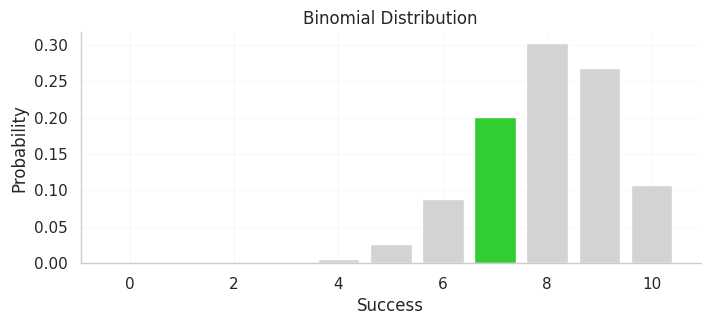

For s = 0.8, simulation:
‚úÖ 0.20‚úÖ 0.20‚ùå 0.98‚ùå 0.98‚úÖ 0.60‚úÖ 0.63‚úÖ 0.65‚úÖ 0.39‚ùå 0.87‚úÖ 0.58
Total success: 7
Probability: 0.2013


In [150]:
import random
import matplotlib.pyplot as plt
from math import comb

n, p = 10, 0.80
inputs = [random.random() for _ in range(n)]
sucess = sum(valor < p for valor in inputs)

prob_binomial = lambda n, x, p: comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
distribution = [prob_binomial(n, x, p) for x in range(n + 1)]

fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(range(n + 1), distribution, color='lightgray')
ax.bar(sucess, distribution[sucess], color='limegreen')
ax.set_xlabel("Success")
ax.set_ylabel("Probability")
ax.set_title("Binomial Distribution")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.grid(True, linestyle="-", alpha=0.1)
plt.show()

print(f"For s = {p}, simulation:")
result = "".join([f"\033[92m‚úÖ\033[0m {valor:.2f}" if valor < p else f"\033[91m‚ùå\033[0m {valor:.2f}" for valor in inputs])
print(result)
print(f"Total success: {sucess}")
print(f"Probability: {distribution[sucess]:.4f}")
